In [3]:
# imports

import pandas as pd
from joblib import dump, load
from sklearn.model_selection import train_test_split

In [ ]:
# inicial dataframe

df = pd.read_csv("phishing.csv")
dump_model = "phishing.pkl"
df

In [17]:
# model definition

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# model = DecisionTreeClassifier(
#     criterion="entropy",
#     max_depth=20,
#     min_samples_split=10
# )

param_grid = {
    "max_depth": [3, 5, 10, None],  
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 5],  
    "criterion": ["gini", "entropy", "log_loss"]  # mathmetical strategy
}

est = DecisionTreeClassifier(random_state=42)

model = GridSearchCV(
    estimator=est,
    param_grid=param_grid,
    scoring="accuracy",  # metrics
    cv=5,  
    n_jobs=-1  # use all available CPU cores
)

In [7]:
# data cleaning and objective setting

Y = df["class"]
X = df.drop(columns=["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [21]:
# model training

model.fit(X_train, Y_train)
dump(model, dump_model)

['phishing.pkl']

In [19]:
# when working with grid search

best_params = model.best_params_
model = model.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [1]:
# prediction

Y_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_pred)

Y_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)

print(f"Train accuracy: {train_accuracy}\nTest accuracy: {test_accuracy}\nAccuracy: {train_accuracy} - {test_accuracy}") 

NameError: name 'model' is not defined

In [10]:
# visualization imports

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

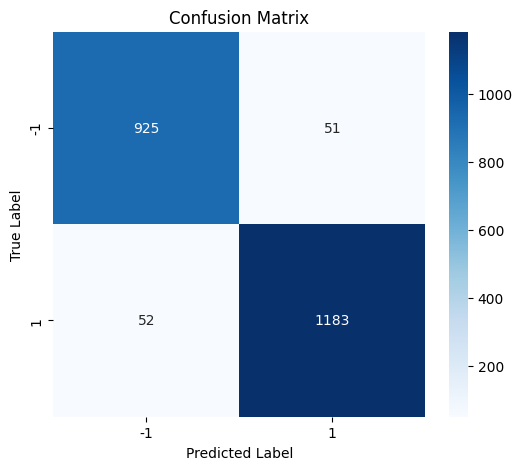

In [16]:
# visualization itself

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()